# ESCI 445 - Exercise 5

### <font color = 'blue'><i>Edit cells that are in blue and have asterisks</i></font>

## Calculating Vorticity and Vorticity Advection

### Import libraries

In [59]:
import numpy as np
import matplotlib.pyplot as plt

### Read in streamfunction data

In [60]:
filename = 'streamfunction_input.dat'

psi = np.loadtxt(filename, dtype = np.float64)
psi = np.transpose(psi)  #  Transposes to get into proper orientation

### Set up parameters

In [61]:
d = 5e4  # Grid spacing in meters
nx, ny = np.shape(psi)  #  Determine shape of array

### Create arrays for vorticity and Jacobian

In [62]:
vort = np.zeros_like(psi)
Jacob = np.zeros_like(psi)

### <font color = 'blue'><i>*Calculate Vorticity using 5-pt Stencil

In [63]:
for j in range(1, ny-1): #Calculate Vorticity using 5 pt Stencil
    for i in range(1,nx-1):
        vort[i,j] = (psi[i+1,j]+psi[i-1,j]+psi[i,j+1]+psi[i,j-1]-4*psi[i,j])/d**2

### <font color = 'blue'><i>*Calculate Jacobian using Arakawa Method

In [64]:
# Arrays to hold three versions of Jacobian
J1 = np.zeros_like(psi)
J2 = np.zeros_like(psi)
J3 = np.zeros_like(psi)

# Write your code here
for j in range(2, ny-2): #Calculate J1, J2, and J3
    for i in range(2,nx-2):
        J1[i,j] = (1 / (4 * d**2)) * ((psi[i+1,j]-psi[i-1,j])*(vort[i,j+1]-vort[i,j-1]) \
                                    - (psi[i,j+1]-psi[i,j-1])*(vort[i+1,j]-vort[i-1,j]))
        
        J2[i,j] = (1 / (4 * d**2)) * (psi[i+1,j]*(vort[i+1,j+1]-vort[i+1,j-1]) - \
                                      psi[i-1,j]*(vort[i-1,j+1]-vort[i-1,j-1]) - \
                                      psi[i,j+1]*(vort[i+1,j+1]-vort[i-1,j+1]) + \
                                      psi[i,j-1]*(vort[i+1,j-1]-vort[i-1,j-1]))
        
        J3[i,j] = (1 / (4 * d**2)) * (vort[i,j+1]*(psi[i+1,j+1]-psi[i-1,j+1]) - \
                                      vort[i,j-1]*(psi[i+1,j-1]-psi[i-1,j-1]) - \
                                      vort[i+1,j]*(psi[i+1,j+1]-psi[i+1,j-1]) + \
                                      vort[i-1,j]*(psi[i-1,j+1]-psi[i-1,j-1]))

Jacob = (J1 + J2 + J3) / 3

### Create Plots

<IPython.core.display.Javascript object>


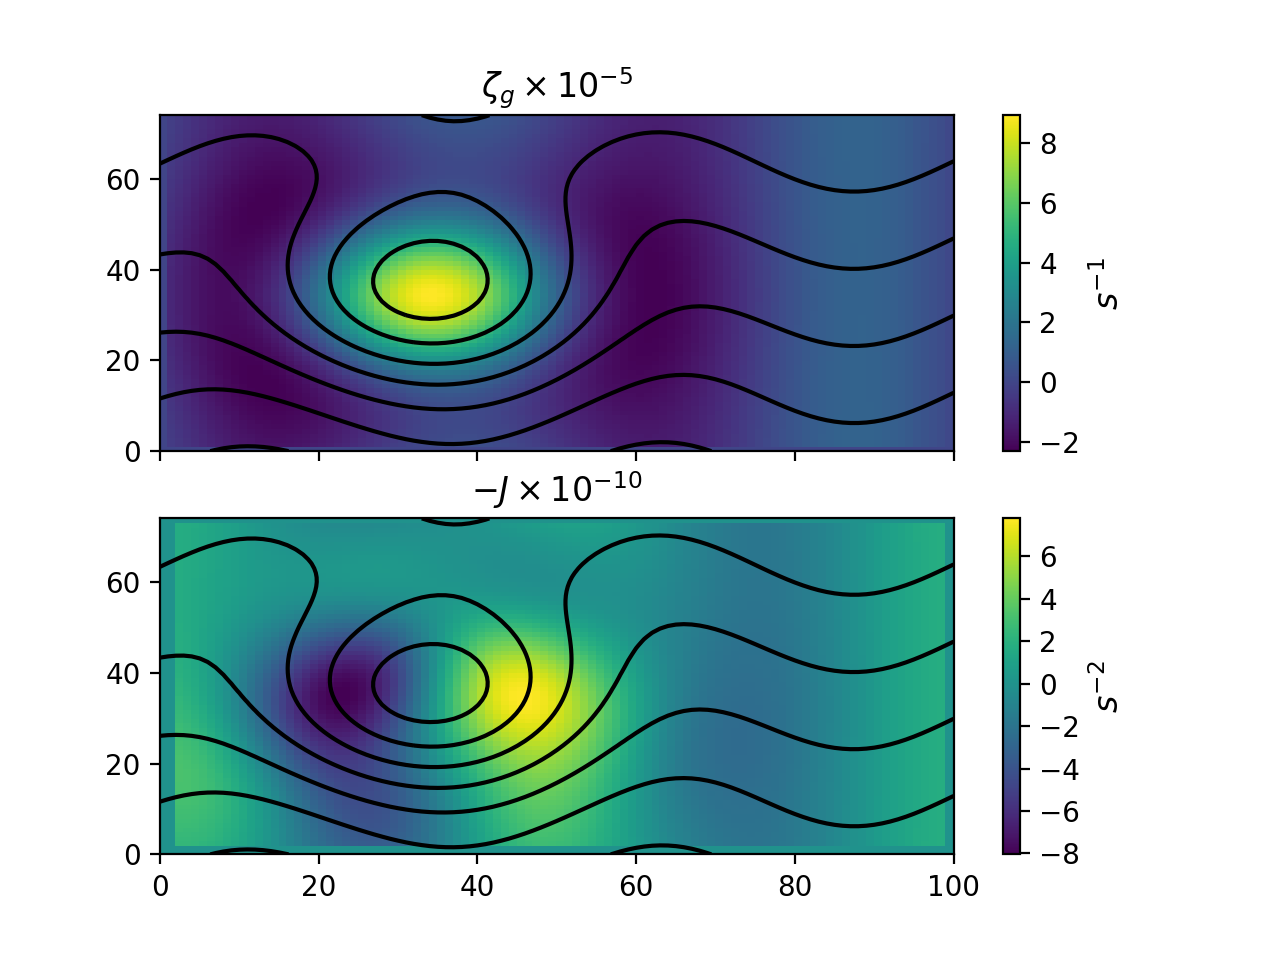

In [67]:
%matplotlib notebook

fig, ax = plt.subplots(2,1,sharex=True,sharey=True)

#  Changes units and trasnpose for plotting
s_vort, s_J, s_psi= np.transpose(vort)*1e5, -np.transpose(Jacob)*1e10, np.transpose(psi)


pc0 = ax[0].pcolor(s_vort,vmin = np.min(s_vort), vmax = np.max(s_vort))
ax[0].set_xlim(0,nx-1)
ax[0].set_ylim(0,ny-1)
cb0 = plt.colorbar(pc0,ax = ax[0])
cb0.set_label(r'$s^{-1}$', size = 'large')
ax[0].contour(s_psi, colors = 'black')
ax[0].set_title(r'$\zeta_g\times 10^{-5}$', size = 'large')

pc1 = ax[1].pcolor(s_J,vmin = np.min(s_J), vmax = np.max(s_J))
cb1 = plt.colorbar(pc1,ax = ax[1])
cb1.set_label(r'$s^{-2}$', size = 'large')
ax[1].contour(s_psi, colors = 'black')
ax[1].set_title(r'$-J\times 10^{-10}$', size = 'large')

plt.show()

In [66]:
print(np.max(Jacob), np.min(Jacob))

8.04470126138e-10 -7.77989803341e-10
